In [1]:
#github.com/echtr

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("world-data-2023.csv")

In [4]:
ndf = df[["Country","Armed Forces size", "Population"]]
ndf

,Country,Armed Forces size,Population
0,Afghanistan,"323,000","38,041,754"
1,Albania,"9,000","2,854,191"
2,Algeria,"317,000","43,053,054"
3,Andorra,NaN,"77,142"
4,Angola,"117,000","31,825,295"
...,...,...,...
190,Venezuela,"343,000","28,515,829"
191,Vietnam,"522,000","96,462,106"
192,Yemen,"40,000","29,161,922"
193,Zambia,"16,000","17,861,030"


In [5]:
ndf.shape, ndf.isnull().sum()

((195, 3),
 Country               0
 Armed Forces size    24
 Population            1
 dtype: int64)

In [6]:
ndf = ndf.dropna()
ndf.shape, ndf.isnull().sum()

((171, 3),
 Country              0
 Armed Forces size    0
 Population           0
 dtype: int64)

In [7]:
ndf.dtypes

Country              object
Armed Forces size    object
Population           object
dtype: object

In [8]:
ndf_ = pd.DataFrame()
ndf_["Name"] = ndf["Country"]
ndf_["Armed Forces size"] = ndf["Armed Forces size"].str.replace(",","")
ndf_["Population"] = ndf["Population"].str.replace(",","")
ndf_

,Name,Armed Forces size,Population
0,Afghanistan,323000,38041754
1,Albania,9000,2854191
2,Algeria,317000,43053054
4,Angola,117000,31825295
5,Antigua and Barbuda,0,97118
...,...,...,...
190,Venezuela,343000,28515829
191,Vietnam,522000,96462106
192,Yemen,40000,29161922
193,Zambia,16000,17861030


In [9]:
ndf_["Armed Forces size"] = ndf_["Armed Forces size"].astype(int)
ndf_["Population"] = ndf_["Population"].astype(int)
ndf_.dtypes

Name                 object
Armed Forces size     int32
Population            int32
dtype: object

In [10]:
ndf_

,Name,Armed Forces size,Population
0,Afghanistan,323000,38041754
1,Albania,9000,2854191
2,Algeria,317000,43053054
4,Angola,117000,31825295
5,Antigua and Barbuda,0,97118
...,...,...,...
190,Venezuela,343000,28515829
191,Vietnam,522000,96462106
192,Yemen,40000,29161922
193,Zambia,16000,17861030


In [11]:
x = ndf_["Population"].to_numpy()
y = ndf_["Armed Forces size"].to_numpy()
len(x) == len(y)

True

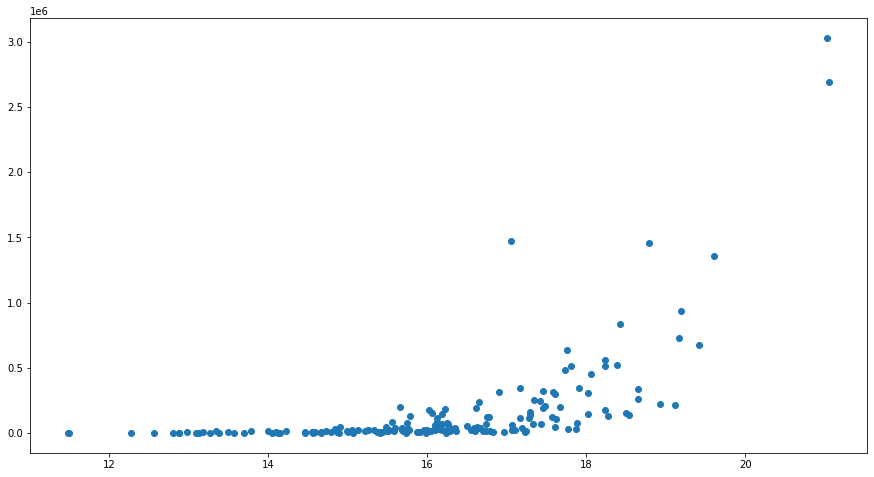

In [12]:
plt.figure(figsize=(15, 8))
plt.scatter(np.log(x), y) # np.log(x)
plt.show() # iki tane uç değer var

In [13]:
ndf_["AP"] = ndf_["Armed Forces size"] / ndf_["Population"]  # armed / population
ndf_

,Name,Armed Forces size,Population,AP
0,Afghanistan,323000,38041754,0.008491
1,Albania,9000,2854191,0.003153
2,Algeria,317000,43053054,0.007363
4,Angola,117000,31825295,0.003676
5,Antigua and Barbuda,0,97118,0.000000
...,...,...,...,...
190,Venezuela,343000,28515829,0.012028
191,Vietnam,522000,96462106,0.005411
192,Yemen,40000,29161922,0.001372
193,Zambia,16000,17861030,0.000896


In [14]:
ndf_.sort_values(by=["AP"], ascending=False) # grafikte gördüğümüz iki uç değer bunlar: north korea, eritrea

,Name,Armed Forces size,Population,AP
127,North Korea,1469000,25666161,0.057235
54,Eritrea,202000,6333135,0.031896
82,Israel,178000,9053300,0.019661
115,Montenegro,12000,622137,0.019288
24,Brunei,8000,433285,0.018464
...,...,...,...,...
97,Libya,0,6777452,0.000000
154,Seychelles,0,97625,0.000000
5,Antigua and Barbuda,0,97118,0.000000
72,Haiti,0,11263077,0.000000


In [15]:
ndf_ = ndf_[ndf_["Name"] != "North Korea"]
ndf_ = ndf_[ndf_["Name"] != "Eritrea"]
ndf_.sort_values(by=["AP"], ascending=False)

,Name,Armed Forces size,Population,AP
82,Israel,178000,9053300,0.019661
115,Montenegro,12000,622137,0.019288
24,Brunei,8000,433285,0.018464
92,Laos,129000,7169455,0.017993
163,South Sudan,185000,11062113,0.016724
...,...,...,...,...
76,Iceland,0,361313,0.000000
72,Haiti,0,11263077,0.000000
154,Seychelles,0,97625,0.000000
97,Libya,0,6777452,0.000000


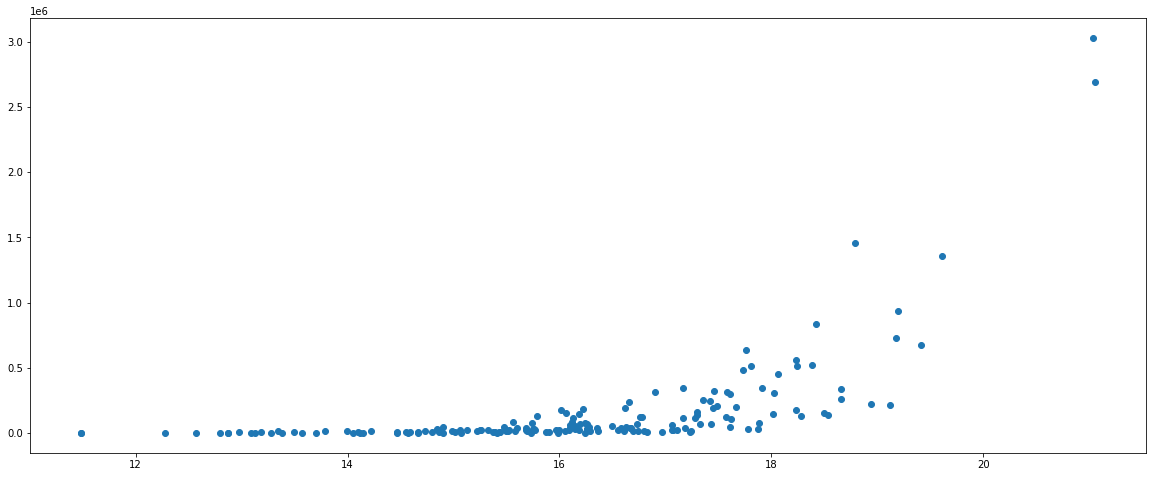

In [16]:
x = ndf_["Population"].to_numpy()
y = ndf_["Armed Forces size"].to_numpy()

plt.figure(figsize=(20, 8))
plt.scatter(np.log(x), y) # np.log(x)
plt.show() # iki tane uç değer var

In [17]:
len(x)

169

In [18]:
#--------------

In [19]:
ndf_.sort_values(by=["AP"], ascending=False)

,Name,Armed Forces size,Population,AP
82,Israel,178000,9053300,0.019661
115,Montenegro,12000,622137,0.019288
24,Brunei,8000,433285,0.018464
92,Laos,129000,7169455,0.017993
163,South Sudan,185000,11062113,0.016724
...,...,...,...,...
76,Iceland,0,361313,0.000000
72,Haiti,0,11263077,0.000000
154,Seychelles,0,97625,0.000000
97,Libya,0,6777452,0.000000


In [20]:
# outlineları kaldırdık ama hindistan ve çin açık ara en çok nüfusa sahip ülkeler. grafitkeki iki nokta onlar olabilir mi acaba?
# fakat grafikteki gibi iki tane outline vardı ve onları kaldırdık. acaba bu bir tesadüf mü? kore eritra - çin hindistan

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
armed_size = ndf_.iloc[:,1].to_numpy().reshape(-1, 1)
population = ndf_.iloc[:,2].to_numpy().reshape(-1, 1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(np.log(population), armed_size, test_size = 1/169, random_state = 123, shuffle=1)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
prediction = model.predict(X_test)

In [36]:
print(prediction)

[[-201134.35018679]]


In [37]:
tahmin = np.array([10000]).reshape(-1, 1)
model.predict(tahmin)

array([[1.26671808e+09]])

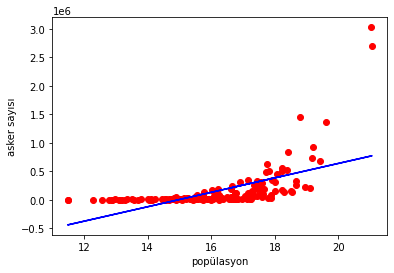

In [38]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.xlabel("popülasyon")
plt.ylabel("asker sayısı")
plt.show()